In [1]:
import cv2 as cv
import argparse
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# for showing float values upto 2 decimal places
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [2]:
def softmax(z):
    '''
    Turns a vector of real values to another vector of real values whose sum is 1. 

    Parameters
    ----------
    z : numpy.ndarray
        real valued vector
        
    Returns
    -------
    softmax_output : numpy.ndarray
        Softmax of the input vector.

    '''
    return np.exp(z) / np.sum(np.exp(z))

def update_probability(current_probability, transition_matrix):
    '''
    Updates the probability by one step using a Markov transition matrix.
    
    Parameters
    ----------
    current_probability : numpy.ndarray
        current probability of the variables
    transition_matrix : numpy.ndarray
        Markov transition matrix
    
    Returns
    -------
    updated_probability : numpy.ndarray
        probability updated by one step
    '''
    return np.dot(current_probability, transition_matrix)

def change_transition_matrix(transition_matrix, change_probability):
    '''
    Randomly modifies the Markov transition matrix (row-wise).
    
    Parameters
    ----------
    transition_matrix : numpy.ndarray
        Markov transition matrix
    change_probability : float
        probability that one or more rows of the transition matrix changes randomly.
    
    Returns
    -------
    transition_matrix : numpy.ndarray
        the updated transition matrix
    '''
    for i in range(3):
        if random.uniform(0, 1) > (1.0 - change_probability):
            row = np.array([random.randint(0, 10), random.randint(0, 10), random.randint(0, 10)])
            transition_matrix[i, :] = softmax(row)
    return transition_matrix

In [3]:
# Group emotion simulation

# initial value
# Happy, Not happy, Undefined
# Engaged, Not engaged, Undefined
happiness = np.array([[0.4, 0.3, 0.3], [0.5, 0.2, 0.3], [0.3, 0.5, 0.2]])
engagedness = np.array([[0.5, 0.2, 0.3], [0.6, 0.3, 0.1], [0.4, 0.2, 0.4]])

happiness_probability = np.array([[0, 0, 1]])
engagedness_probability = np.array([[0, 0, 1]])

In [4]:
for i in range(20):
    happiness = change_transition_matrix(happiness, 0.2)
    happiness_probability = update_probability(happiness_probability, happiness)
    
    engagedness = change_transition_matrix(engagedness, 0.2)
    engagedness_probability = update_probability(engagedness_probability, engagedness)
    
#     print(happiness_probability)
#     print(engagedness_probability)

In [29]:
def display_image(image, title='', figsize=None):
    '''
    Displays a cv image.

    Parameters
    ----------
    image : numpy.ndarray
        image in a numpy array.
    title : string, optional
        title of the image. The default is ''.

    Returns
    -------
    None.

    '''
    if figsize != '':
        plt.figure(figsize=figsize, dpi= 100, facecolor='w', edgecolor='k')
    image = image.astype('float32') * 255
    if image.ndim == 3:    # color image
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGRA2RGB).astype('uint8'), cmap='cubehelix')        
    elif cv_image.ndim == 2:    # grayscale image
        plt.imshow(image, cmap='gray')
    plt.colorbar()
    plt.title(title)
    plt.show()

In [6]:
## Trackbar Data
title_window = 'Skinney Pandas'


## load images into array
images = [cv.imread('images/1.jpg'),cv.imread('images/2.jpg')]

##Settings of concatenated image
max_width = 1200 # 
max_height = 900 #

## fake emotions
opacity = 30
happyness = 60
engagement = 10

### text settings
font = cv.FONT_HERSHEY_SIMPLEX
org = (50, 50)
fontScale = 2
color = (0, 255,0 )
thickness = 5
imgtext= 'text'

In [7]:
"""
    Reduces the size(width and height) of the given image by 
    the given percentage.
"""
def reduceSizeByPercentage(img, percentage):
    width = int((max_width*percentage)/100)
    height = int((max_height*percentage)/100)
    return cv.resize(img,(width, height), interpolation = cv.INTER_AREA)

In [8]:
"""
    Concatenates two images horizontally
"""
def concat_images(imga,imgb):
    ha,wa = imga.shape[:2]
    hb,wb = imgb.shape[:2]
    new_img = np.zeros(shape=(np.max([ha, hb]), wa+wb, 3),dtype=np.uint8)
    new_img[new_img == 0] = 255
    new_img[:ha,:wa]=imga
    new_img[:hb,wa:wa+wb]=imgb
    return new_img

In [9]:
"""
    concatenates n images from a list of images.
"""
def concat_n_images(images):
    output = None
    for i, img in enumerate(images):
        if i==0:
            output = img
        else:
            output = concat_images(output, img)
    return output

In [10]:
"""
    Calculates the unknown variable that is multiplied by the two values 
    so that their sum adds up to 100 to keep the ratio of the
    two values. 
"""
def calculate_new_ratio(value1, value2):
    #(20*x+50*x) = 100
    diff =100/(happyness+engagement)
    value1 = value1*diff
    value2 = value2*diff
    return (value1,value2)

In [11]:
"""
    Returns the resized images based on the emotion percentage 
"""
def get_resized_images(hap, enga):
    happyness,engagement = calculate_new_ratio(hap, enga)
    img1 = reduceSizeByPercentage(images[0], happyness)
    img2 = reduceSizeByPercentage(images[1], engagement)
    return [img1,img2]

In [12]:
"""
    Changes the Opacity/Alpha Value of an given image
"""
def getRGBA(opacity,src):
    img = np.array(src, dtype=float)
    img /= 255.0
    a_channel = np.ones(img.shape, dtype=float)-(opacity/100)
    return img*a_channel

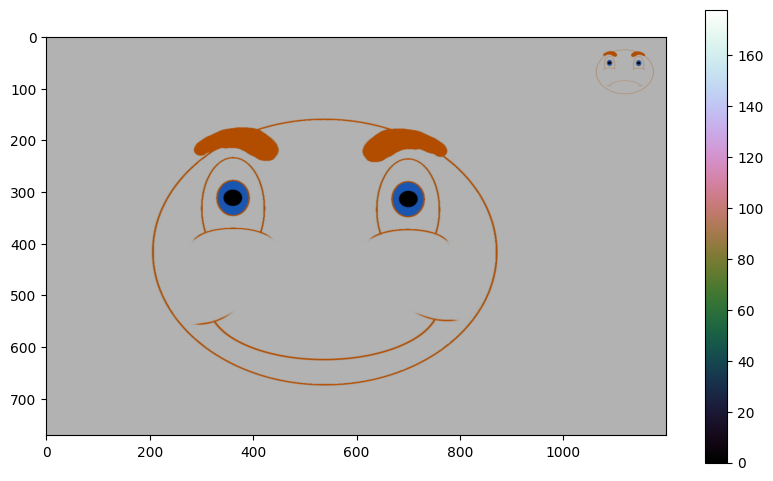

In [31]:

output = concat_n_images(get_resized_images(happyness,engagement))
output = getRGBA(opacity,output)


display_image(output, figsize=(10, 6))
# cv.imshow('img',output)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [14]:
###Ignore following cells

In [15]:
def blendImages(val):
    alpha = val / alpha_slider_max
    beta = 1-alpha
    print(beta)
    if(alpha >= 0.5):
        beta = 0
        alpha = 1
        imgtext = 'NOOOOICE'
    else:
        beta = 1.0
        alpha = 0
        imgtext = 'BRUUUUH'
    dst = cv.addWeighted(src1, alpha, src2, beta , 0.0)
    dst = cv.putText(dst, imgtext, org, font, fontScale, color, thickness, cv.LINE_AA)
    cv.imshow(title_window, dst)
    cv.waitKey(1000)

In [16]:
def loopCallBlendImages():
    ## Check if images are valid
    if src1 is None:
        print('Could not open or find the image:')
    exit(0)
    if src2 is None:
        print('Could not open or find the image:')
    exit(0)
    
    ## switch between images 
    while True:
        blendImages(random.choice(emotions))